## MA124 Homework Assignment A
### Due in by 1200 on Friday 29th November 2024
#### Submission
Hand in is via the [MA124 Moodle page](https://moodle.warwick.ac.uk/course/view.php?id=64482).

The hand-in link will be available from Monday 25th November.

You should submit **this Jupyter notebook only**. **This must be a `.ipynb` file, not a pdf file or any other file type**. You need to clearly label your plots. There are no additional marks based on overall quality and clarity of the submission.  

You may wish to comment your code but you will not lose marks for not doing so. Note that you will be expected to comment your code for the project next term so you may wish to have a go at this now.

The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose one mark if you submit a notebook that has not been run.**

**The usual submission rules and those rules stated at the end of this document apply. In particular, the noon deadline is strict. You should not wait until the very last moment to submit your work and you should make sure that you submit the correct work.**

**Note that, in line with university policy, you must declare the use of a generative Artificial Intelligence such as ChatGPT in your submission, including your reason for using it. If you do this please include any such declaration in markdown cells. You risk losing marks for using a generative Artificial Intelligence, depending on your reasons for doing so, and this will be judged on a case by case basis.**



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

---

### Task 1 Taylor series approximations (6 marks)

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

Note that for a given $N$, there are $N+1$ terms of the sine series and the highest power of $x$ is $x^{2N+1}$.

In this task you will plot some of these approximations to sine alongside a graph of the true sine.

Insert code cell(s) below as appropriate to do this.

**Specifically, your code should**

- Include a Python function, with name of your choice, that computes the approximations to $\sin(x)$. The function should have two inputs: `x` and `N`, where `N` is a postive integer. The function should return the series approximation with `N` terms evaluated at `x`.

- Include Python code to plot the true $\sin(x)$ for $x \in [-3\pi, 3\pi]$ and **on the same graph** plot the series approximations for all values of `N` from 0 to some maximum value between 5 and 8. In other words plot the graphs of $g_0(x)=x,g_1(x)=x-\displaystyle\frac{x^3}{3!},g_2(x)=x-\displaystyle\frac{x^3}{3!}+-\displaystyle\frac{x^5}{5!}$ and so on until you have between 6 and 9 of them. You can decide what you think looks nice. 

For the plots you will want to play with line weights, styles, labels and/or colours to distinguish the true function and the approximate curves. You will also need to adjust the vertical plot limits to have informative plots.

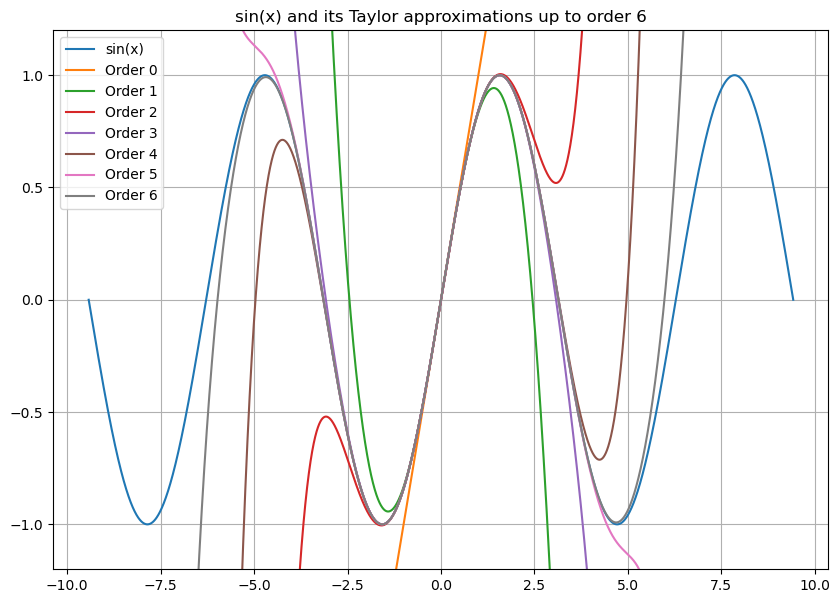

In [2]:
def taylor_approx_sin(x: float, N: int) -> float:
    return np.sum([
        (-1)**n * (x**(2*n + 1)) / math.factorial(2*n + 1)
        for n in range(0, N + 1)
    ])

# Make it big enough that the legend won't overlap with the graphs
fig = plt.figure(figsize=(10, 7))

# We will plot Taylor series approximations of order 1 up to max_order
max_order = 6

xs = np.linspace(-3 * np.pi, 3 * np.pi, 10_001)

# Plot the real sin(x)
plt.plot(xs, np.sin(xs), label="sin(x)")

# Plot the approximations and label their orders
for n in range(max_order + 1):
    plt.plot(xs, [taylor_approx_sin(x, n) for x in xs], label=f"Order {n}")

plt.title(f"sin(x) and its Taylor approximations up to order {max_order}")
plt.ylim(-1.2, 1.2)
plt.grid(True, which='both')
plt.legend()

plt.show()

---
### Task 2 Monte Carlo estimate to a definite integral (4 marks)
Use the method of taking the mean, as illustrated in the week 8 lecture and in the workbook *6_MC_integration.ipynb*, to estimate **one** of the following definite integrals. 

- $f(x) = \sqrt{1-x^4}$ on $[0, 1]$. 
- $f(x) = e^{e^x}$ on $[-1,0]$.
- $f(x) = \ln(\ln(x))$ on $[e,e^{e}]$

Your code should also generate a simple graph of your function.

Insert code cell(s) below as appropriate to do this.

**Specifically, your code should**

- Calculate an average to $f(x)$ across the interval for you chosen integral based on a suitably large number of evenly spaced points.
- Multiply this value by the width of the integral to get an estimate to the definite integral you chose.
- Print the number of points you used and the estimate of the integral you got with suitable accompanying text to state what each value is.
- Generate a simple graph of your function showing its graph across the interval of integration and the 'approximating rectangle' with appropriate formatting and labelling (there is no need to shade the area corresponding to the definite integral concerned).


The estimation for the integral of f is 8.83507688748487


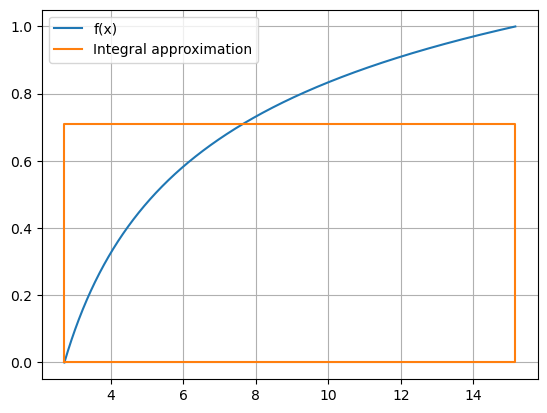

In [3]:
# Choose the function you want to use by commenting out the other ones

# func, domain = lambda x: (1 - x**4)**(1/2), (0, 1)  # We use **(1/2) because math.sqrt doesn't recognise NumPy arrays
# func, domain = lambda x: math.e**(math.e**x), (-1, 0)
func, domain = lambda x: np.log(np.log(x)), (math.e, math.e**math.e)

N = 1000
x_min, x_max = domain

# A Monte Carlo estimation would use uniformly sampled random numbers in the range,
# but the question specifically asks for "evenly spaced points"
# samples = np.random.uniform(x_min, x_max, N)
samples = np.linspace(x_min, x_max, N + 1)
f_mean = np.mean(func(samples))

print(f"The estimation for the integral of f is {(x_max - x_min) * f_mean}")

xs = np.linspace(x_min, x_max, N + 1)
plt.plot(xs, func(xs), label="f(x)")
plt.plot([x_min, x_max, x_max, x_min, x_min], [0, 0, f_mean, f_mean, 0], label="Integral approximation")

plt.grid(True, which='both')
plt.legend()
plt.show()

---
### Task 3 - Monte Carlo estimation to a volume (6 marks)
This task requires you will write a function a number of points returns an estimate to the volume of the cylinder with radius 1 and height 1 by considering the positions of $n$ randomly generated points in the same way as the  examples seen in *5_MC_volumes_integration.ipynb*.

Insert code cell(s) below as appropriate to do this.

**Specifically, your code should:**
- Include an indicator function for a cylinder with radius 1 and height 1, whose base is on the $x-y$ plane and which is centred on the $z$-axis, called `Indicator_cylinder`, which takes in the coordinates of a point $(x,y,z)$ , and returns 1 if the point is inside the cylinder and 0 if the point is outside the cylinder.
- Include a function called `Estimate` which takes a positive integer $n$ as its input and makes use of `Indicator_cylinder` to return an estimate to the volume of the cyclinder described above by using $n$ randomly generated points each with its $x$, $y$ and $z$ coordinates in a suitable range, using the same approach as illustrated in the workbook *5_MC_Volumes.ipynb*.
- Prints the values of `Estimate(100)`,`Estimate(1000)','Estimate(10000)` with suitable accompanying text to say which is which.
- Print the true volume, with suitable accompanying text to state that this is the true volume.

No pictures required.


In [4]:
def indicator_cylinder(x, y, z) -> int:
    return 1 * ((np.sqrt(x**2 + y**2) < 1) and (0 < z < 1))


def estimate(n: int) -> float:
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = 0, 1

    cuboid_volume = (x_max - x_min) * (y_max - y_min) * (z_max - z_min)

    x = np.random.uniform(x_min, x_max, n)
    y = np.random.uniform(y_min, y_max, n)
    z = np.random.uniform(z_min, z_max, n)

    points_in_shape = 0
    for i in range(n):
        points_in_shape += indicator_cylinder(x[i], y[i], z[i])

    return cuboid_volume * (points_in_shape / n)


n_values = [100, 1000, 10_000]
for n in n_values:
    print(f"estimate({n:3,}) = {estimate(n)}")

print(f"true volume = {np.pi:.6}")

estimate(100) = 3.12
estimate(1,000) = 3.14
estimate(10,000) = 3.1464
true volume = 3.14159


---
### Task 4 Importing a dataframe and drawing a histogram (4 marks)

The **UCI Repository**

The [Center for Machine Learning and Intelligent Systems](https://cml.ics.uci.edu) at the University of California, Irvine, hosts a  [Machine Learning Repository](http://archive.ics.uci.edu/) containing many datasets for machine learning. Here you are walked through how to download a dataset from there and then create a Pandas dataframe from it. Then you will produce a histogram from the data in one of the columns. A similar example can be found in the workbook *8_Pandas.ipynb*.

**Specifically,**

- Go to this repository and find the `Wine Quality` dataset. **(Not the `Wine` dataset but the `Wine Quality` dataset.)** Open the page for the dataset, and then select 'Download'.

- The downloaded file will be a zip folder; unzip this, or otherwise extract the `winequality-white.csv` file and put it into the same folder as this notebook. If you are using JupyterLab you should see the .csv file in the file browser in JupyterLab. If you are using an installed version of JupyterNotebook (e.g. via Anaconda) you should check the .csv file is in the same folder as this notebook there (or directly in the folders on the machine you are using). If you using JupterNotebook via Noteable you should upload the .csv file to the same virtual folder as the one containing this notebook (there will be a video about this on the MA128 Moodle page soon).

- Execute the code cell below to read `winequality-white.csv` into a pandas DataFrame. Here the keyword argument `sep=';'` is used because the file uses semicolons for the column delimiter/separator (and not commas as is often the case). You should see that one of the twelve column headings (i.e. one of the attributes) is called "fixed acidity".

- Add a new code cell (below the one below) in which you create a Series for "fixed acidity" and then draw a histogram of it with 40 'bins'. Label the histogram appropriately.

- Insert a markdown cell below your histogram and make a very brief comment about some feature of the histogram. **This must be in a markdown cell rather than being printed using code, otherwise you will lose a mark.**

In [5]:
import pandas as pd

wine = pd.read_csv("winequality-white.csv", sep=';') 
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


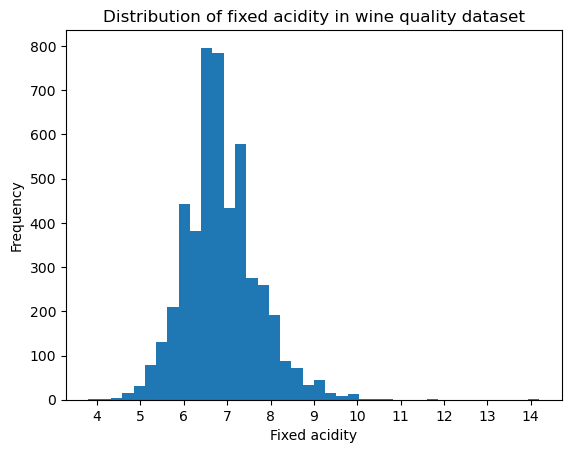

In [6]:
fixed_acidity_series = wine["fixed acidity"]

# Create the histogram
plt.hist(fixed_acidity_series, bins=40)

# Set the labels and title
plt.xlabel("Fixed acidity")
plt.ylabel("Frequency")
plt.title("Distribution of fixed acidity in wine quality dataset")

# Matplotlib does xticks in steps of 2 by default here for some reason, but steps of 1 look much better
plt.xticks(np.arange(fixed_acidity_series.min().round(), fixed_acidity_series.max(), step=1))

plt.show()

The mean fixed acidity is just below 7, and most wines in the dataset have a fixed acidity between 6 and 8.